# Neural Network Classifier

In [10]:
import numpy as np
import tensorflow.keras as tf
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split

In [2]:
datadir = "/Users/paul/Documents/Python/Classifier/kagglecatsanddogs_3367a/PetImages"
categories = ['Dog', 'Cat']

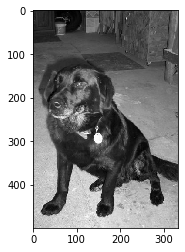

In [13]:
for category in categories : 
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = plt.cm.gray)
        plt.show()
        break
    break
    

In [14]:
print(img_array)

[[ 41  42  43 ... 123 138 135]
 [ 39  40  41 ... 133 143 136]
 [ 40  41  41 ... 139 145 135]
 ...
 [207 194 213 ... 207 198 188]
 [203 190 212 ... 202 191 184]
 [172 168 204 ... 195 182 179]]


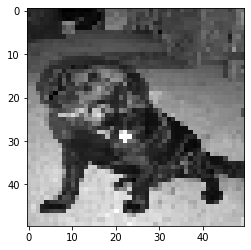

In [15]:
img_size = 50

new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap = plt.cm.gray)
plt.show()


In [130]:
training_data = []

def create_training_data():
    for category in categories : 
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        
        for img in os.listdir(path):
            try : 
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
           
create_training_data()

In [131]:
training_data[0]

[array([[ 43,  44,  41, ...,  78, 115, 111],
        [ 32,  49,  43, ...,  75, 108, 143],
        [ 60,  49,  41, ...,  75, 102, 134],
        ...,
        [190, 190, 200, ..., 175, 179, 177],
        [189, 183, 193, ..., 183, 183, 214],
        [179, 194, 195, ..., 192, 190, 211]], dtype=uint8), 0]

In [132]:
training_data_2 = []

def create_training_data_2():
    for category in categories : 
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        
        for img in os.listdir(path):
            try : 
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                training_data_2.append([img_array, class_num])
            except Exception as e:
                pass
            
create_training_data_2()

In [133]:
img_visu = np.asarray(training_data_2)

In [134]:
img_train, img_test = train_test_split(img_visu, train_size = 0.8, random_state = 42)

In [135]:
print(len(training_data))

24946


In [136]:
X = []
y = []

In [137]:
for features, label in training_data : 
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size)
y = np.asarray(y)

In [138]:
np.save('features.npy', X)
np.save('labels.npy', y)

In [8]:
X = np.load('features.npy')
y = np.load('labels.npy')

In [11]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

X_train = tf.utils.normalize(X_train, axis = 1)
X_test = tf.utils.normalize(X_test, axis = 1)


print(X_train.shape, X_test.shape)


(19956, 50, 50) (4990, 50, 50)


In [17]:
from mish import Mish
model = tf.models.Sequential()
model.add(tf.layers.Flatten())
model.add(tf.layers.Dense(128, activation = "Mish"))
model.add(tf.layers.Dense(128, activation = "Mish"))
model.add(tf.layers.Dense(2, activation = "softmax"))

model.compile(optimize = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 3)

Train on 19956 samples
Epoch 1/3
19956/19956 [==============================] - 2s 116us/sample - loss: 0.6972 - accuracy: 0.5425
Epoch 2/3
19956/19956 [==============================] - 2s 95us/sample - loss: 0.6690 - accuracy: 0.5890
Epoch 3/3
19956/19956 [==============================] - 2s 94us/sample - loss: 0.6588 - accuracy: 0.5987


In [241]:
model.save('Cats_dogs')

INFO:tensorflow:Assets written to: Cats_dogs/assets


In [242]:
#val_loss, val_accuracy = model.evaluate(X_test, y_test)

In [21]:
new_model = tf.models.load_model('Cats_dogs')
predictions = new_model.predict(X_test)

In [22]:
def cat_dogs(number):
    line = predictions[number]
    if np.argmax(line) == 1 : 
        print('Cat')
    else : 
        print('Dog')
    
    plt.imshow(img_test[number][0], cmap = plt.cm.gray)
    plt.show()
    
    return

In [23]:
cat_dogs(83)

Dog


NameError: name 'img_test' is not defined

# Convolutionnal Neural Network Classifier

In [13]:
from random import shuffle
from tqdm.autonotebook import tqdm
import tensorflow.keras as tf
#import tflearn
#from tflearn.layers.conv import conv_2d, max_pool_2d
#from tflearn.layers.core import input_data, dropout, fully_connected
#from tflearn.layers.estimator import regression

In [2]:
datadir = "/Users/paul/Documents/Python/Classifier/kagglecatsanddogs_3367a/PetImages"
categories = ['Dog', 'Cat']

In [3]:
img_size   = 50
l_rate     = 0.001
model_name = 'dog_cat_CNN'

In [7]:
training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        print(category)
        
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()


Dog



Cat


In [8]:
shuffle(training_data)

In [9]:
X, y = [], []
for features, label in training_data : 
    X.append(features)
    y.append(label)
    
X = np.asarray(X).reshape(-1, img_size, img_size, 1)
y = np.asarray(y)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [14]:
X_train = tf.utils.normalize(X_train, axis = 1)
X_test = tf.utils.normalize(X_test, axis = 1)

In [15]:
X_train = np.array([i for i in X_train])
X_test  = np.array([i for i in X_test])
y_train = np.array([i for i in y_train])
y_test  = np.array([i for i in y_test])

In [6]:
%env TF_KERAS = 1

env: TF_KERAS=1


In [16]:
import tensorflow.keras as tf
from mish import Mish
from keras_radam import RAdam
 
# Définition de l'optimizer (avec quelques paramètres qu'il faudra adapter à ses besoins)
opt = RAdam(total_steps=5000, warmup_proportion=0.1, min_lr=1e-5)

In [20]:
model = tf.models.Sequential()


model.add(tf.layers.Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "Mish" , 
                           input_shape = X.shape[1:]))
          
model.add(tf.layers.MaxPooling2D(pool_size = 2))
model.add(tf.layers.Dropout(0.3))

model.add(tf.layers.Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "Mish" , 
                           input_shape = X.shape[1:]))

model.add(tf.layers.MaxPooling2D(pool_size = 2))
model.add(tf.layers.Dropout(0.3))


model.add(tf.layers.Flatten())

model.add(tf.layers.Dense(1024, activation = "Mish"))
model.add(tf.layers.Dropout(0.5))
model.add(tf.layers.Dense(2, activation = "softmax"))

model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 50, 50, 64)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 32)        8224      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)             

In [18]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", learning_rate = l_rate, metrics = ["accuracy"], n_jobs = -1)

In [19]:
model.fit(X_train, y_train, epochs = 3)

Train on 19956 samples
Epoch 1/3
19956/19956 [==============================] - 94s 5ms/sample - loss: 0.6732 - accuracy: 0.5691
Epoch 2/3
19956/19956 [==============================] - 94s 5ms/sample - loss: 0.6006 - accuracy: 0.6735
Epoch 3/3
 2464/19956 [==>...........................] - ETA: 1:22 - loss: 0.5604 - accuracy: 0.7118

KeyboardInterrupt: 

In [176]:
#val_loss, val_accuracy = model.evaluate(X_test, y_test)

In [170]:
model.save(model_name)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: dog_cat_CNN/assets


In [178]:
new_model = tf.models.load_model(model_name)
predictions = new_model.predict(X_test)

In [209]:
cat_dogs(predictions[96])

Dog


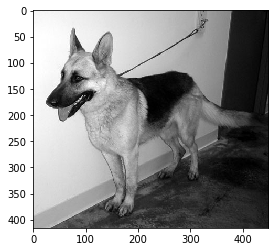

In [210]:
plt.imshow(img_test[96][0], cmap = plt.cm.gray)
plt.show()